In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import lib.db as db

In [2]:
cnx = db.connect()

pico = pd.read_sql('SELECT * FROM picogreen', cnx)
pico.head()

,picogreen_id,well,rfu,ng_microliter,ng_microliter_mean,quant_method,quant_date,sample_id
0,13_02,,,,,,,e58072c6-ce0f-4029-9246-9756c391d944
1,13_01,A1,195.286,9.64549,10.18926376,picogreen,2_15_18,c84c6871-887f-479e-bf1e-ff1c68b1c490
2,,B1,217.399,10.733,NA,picogreen,2_15_18,
3,13_02,A2,1149.629,56.5812,65.82438892,picogreen,2_15_18,e58072c6-ce0f-4029-9246-9756c391d944
4,,B2,1525.514,75.0676,NA,picogreen,2_15_18,


In [3]:
has_id = pico['picogreen_id'].str.match(r'\d\d_\d\d')
has_yield = pd.to_numeric(pico['ng_microliter_mean'], errors='coerce').notna()

yields = pd.to_numeric(pico[has_id & has_yield]['ng_microliter_mean'])
yields.head()

534

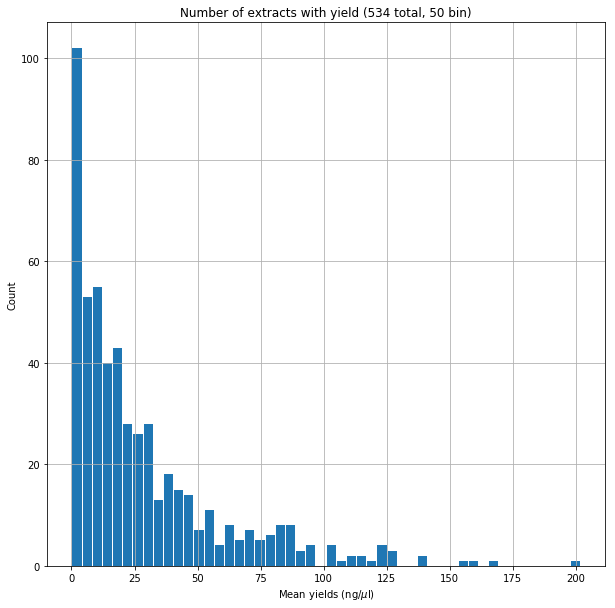

In [4]:
bins = 50

plt.subplots(figsize=(10, 10))
plt.title(f'Number of extracts with yield ({yields.count()} total, {bins} bin)')
plt.xlabel(r'Mean yields (ng/$\mu$l)')
plt.ylabel('Count')
plt.grid(True)
plt.hist(yields, bins=bins, rwidth=0.9)
plt.show()